In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 13\glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
data['Type']=data['Type'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [4]:
x=data.iloc[:,0:9]
y=data.iloc[:,9]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# For 3 nearest neighbours:-

In [13]:
neighbours=KNeighborsClassifier(n_neighbors=3)

In [14]:
### Fitting with training data:-
neighbours.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
train_accuracy=np.mean(y_train==neighbours.predict(x_train))
print('Training data prediction accuracy:-',train_accuracy)

Training data prediction accuracy:- 0.8456375838926175


In [16]:
test_accuracy=np.mean(y_test==neighbours.predict(x_test))
print('Test data prediction accuracy:-',test_accuracy)

Test data prediction accuracy:- 0.6461538461538462


# For 5 nearest neighbours:-

In [17]:
neighbours=KNeighborsClassifier(n_neighbors=5)

In [18]:
neighbours.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
train_accuracy=np.mean(y_train==neighbours.predict(x_train))
print('Training data prediction accuracy:-',train_accuracy)

Training data predict accuracy:- 0.7651006711409396


In [20]:
train_accuracy=np.mean(y_test==neighbours.predict(x_test))
print('Test data prediction accuracy:-',test_accuracy)

Test data prediction accuracy:- 0.6461538461538462


# Running KNN algorithm for 1 to 4 nearest neighbours and the accuracy values:-

In [22]:
acc= []
for i in range(1,40):
    neighbours=KNeighborsClassifier(n_neighbors=i)
    neighbours.fit(x_train,y_train)
    train_acc=np.mean(y_train==neighbours.predict(x_train))
    test_acc=np.mean(y_test==neighbours.predict(x_test))
    acc.append([train_acc,test_acc])

Text(0, 0.5, 'Accuracy of the train data:-')

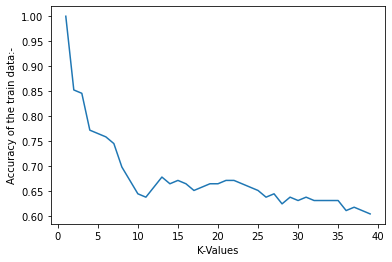

In [24]:
plt.plot(np.arange(1,40),[i[0] for i in acc])
plt.xlabel('K-Values')
plt.ylabel('Accuracy of the train data:-')

Text(0, 0.5, 'Accuracy of the test data:-')

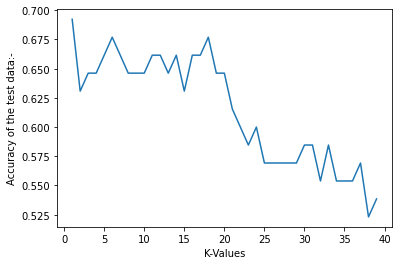

In [25]:
plt.plot(np.arange(1,40),[i[1] for i in acc])
plt.xlabel('K-Values')
plt.ylabel('Accuracy of the test data:-')

In [26]:
accuracy_df=pd.DataFrame(acc,columns=['Train Accuracy','Test Accuracy'])
accuracy_df

,Train Accuracy,Test Accuracy
0,1.000000,0.692308
1,0.852349,0.630769
2,0.845638,0.646154
3,0.771812,0.646154
4,0.765101,0.661538
5,0.758389,0.676923
6,0.744966,0.661538
7,0.697987,0.646154
8,0.671141,0.646154
9,0.644295,0.646154


In [29]:
accuracy_df['K-Values']=np.arange(1,40)
accuracy_df

,Train Accuracy,Test Accuracy,K-Values
0,1.000000,0.692308,1
1,0.852349,0.630769,2
2,0.845638,0.646154,3
3,0.771812,0.646154,4
4,0.765101,0.661538,5
5,0.758389,0.676923,6
6,0.744966,0.661538,7
7,0.697987,0.646154,8
8,0.671141,0.646154,9
9,0.644295,0.646154,10


### Here K=6 has the best values of accuracies for both the train and the test data!